In [1]:
from qiskit import IBMQ, execute
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.ibmq.job import job_monitor
from qiskit.circuit.random import random_circuit

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('simulator_statevector')

In [3]:
# list all jobs which have been executed from our provider in the past
for job in backend.jobs():
    print(job.job_id())
    job_monitor(job)


6071b2994ee21ebcaab00e14
Job Status: job has successfully run
6071b102b08e35e2fa066daa
Job Status: job has successfully run
6071af284ee21e9c69b00def
Job Status: job has been cancelled
6071aedeb8a875d20aee87eb
Job Status: job has been cancelled
6071ae16bb1d88c21b08cab5
Job Status: job has been cancelled
60707bd3d9a6cb0eb34266bb
Job Status: job has successfully run
60706f0e8e1d071686671fc9
Job Status: job has successfully run
60704f00b8a875d2e6ee7d28
Job Status: job has successfully run


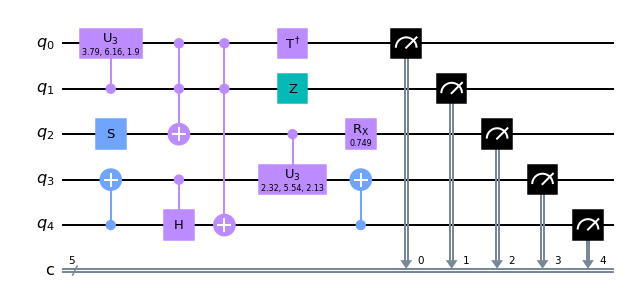

In [4]:
qc = random_circuit(num_qubits=5, depth=4, measure=True)
qc.draw(output='mpl')

In [6]:
job = execute(qc, backend, shots=4096, job_name="test_job_name", job_tags=["test", "job"])
job_monitor(job)

Job Status: job has successfully run


In [7]:
counts = job.result().get_counts(0)
counts

{'00000': 3533, '00100': 563}